<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/one/blob/main/TUGAS_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set random seed untuk reproduktifitas
np.random.seed(42)

# Generate data penjualan
def generate_sales_data(n_rows=100):
    product_ids = [f'P{i:03d}' for i in range(1, 21)]  # 20 produk

    sales_data = {
        'sale_id': [f'S{i:03d}' for i in range(1, n_rows + 1)],
        'product_id': np.random.choice(product_ids, n_rows),
        'customer_id': [f'C{i:03d}' for i in range(1, n_rows + 1)],
        'sale_date': [(datetime(2024, 1, 1) + timedelta(days=np.random.randint(0, 365))).strftime('%Y-%m-%d') for _ in range(n_rows)],
        'quantity': np.random.randint(1, 10, n_rows),
        'sale_price': np.random.uniform(50000, 1000000, n_rows).round(2)
    }

    return pd.DataFrame(sales_data)

# Generate data pelanggan
def generate_customer_data(n_rows=100):
    cities = ['Jakarta', 'Surabaya', 'Bandung', 'Medan', 'Semarang']

    customer_data = {
        'customer_id': [f'C{i:03d}' for i in range(1, n_rows + 1)],
        'age': np.random.randint(18, 65, n_rows),
        'gender': np.random.choice(['Pria', 'Wanita'], n_rows),
        'city': np.random.choice(cities, n_rows),
        'membership_date': [(datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 730))).strftime('%Y-%m-%d') for _ in range(n_rows)]
    }

    return pd.DataFrame(customer_data)

# Generate data produk
def generate_product_data(n_products=20):
    categories = ['Elektronik', 'Fashion', 'Makanan', 'Kesehatan', 'Perabotan']

    product_data = {
        'product_id': [f'P{i:03d}' for i in range(1, n_products + 1)],
        'category': np.random.choice(categories, n_products),
        'base_price': np.random.uniform(40000, 800000, n_products).round(2),
        'stock': np.random.randint(10, 1000, n_products)
    }

    return pd.DataFrame(product_data)

# Generate data pemasaran
def generate_marketing_data(n_rows=100):
    channels = ['Social Media', 'Email', 'Search Ads', 'Display Ads', 'Affiliate']

    marketing_data = {
        'campaign_id': [f'M{i:03d}' for i in range(1, n_rows + 1)],
        'channel': np.random.choice(channels, n_rows),
        'start_date': [(datetime(2024, 1, 1) + timedelta(days=np.random.randint(0, 365))).strftime('%Y-%m-%d') for _ in range(n_rows)],
        'end_date': [(datetime(2024, 1, 1) + timedelta(days=np.random.randint(0, 365))).strftime('%Y-%m-%d') for _ in range(n_rows)],
        'cost': np.random.uniform(1000000, 10000000, n_rows).round(2)
    }

    return pd.DataFrame(marketing_data)

# Generate data browsing
def generate_browsing_data(n_rows=100):
    browsing_data = {
        'browse_id': [f'B{i:03d}' for i in range(1, n_rows + 1)],
        'customer_id': [f'C{i:03d}' for i in range(1, n_rows + 1)],
        'product_id': [f'P{str(np.random.randint(1, 21)).zfill(3)}' for _ in range(n_rows)],
        'visit_date': [(datetime(2024, 1, 1) + timedelta(days=np.random.randint(0, 365))).strftime('%Y-%m-%d') for _ in range(n_rows)],
        'duration_seconds': np.random.randint(10, 3600, n_rows)
    }

    return pd.DataFrame(browsing_data)

# Membuat dataset
sales_df = generate_sales_data()
customer_df = generate_customer_data()
product_df = generate_product_data()
marketing_df = generate_marketing_data()
browsing_df = generate_browsing_data()

# Menampilkan hasil
print("Data Penjualan:")
print(sales_df.head())
print("\nData Pelanggan:")
print(customer_df.head())
print("\nData Produk:")
print(product_df.head())
print("\nData Pemasaran:")
print(marketing_df.head())
print("\nData Browsing:")
print(browsing_df.head())

# Menyimpan dataset ke CSV (opsional)
sales_df.to_csv('sales_data.csv', index=False)
customer_df.to_csv('customer_data.csv', index=False)
product_df.to_csv('product_data.csv', index=False)
marketing_df.to_csv('marketing_data.csv', index=False)
browsing_df.to_csv('browsing_data.csv', index=False)

Data Penjualan:
  sale_id product_id customer_id   sale_date  quantity  sale_price
0    S001       P007        C001  2024-04-08         6   268676.00
1    S002       P020        C002  2024-06-20         7   524233.71
2    S003       P015        C003  2024-12-25         4   593403.99
3    S004       P011        C004  2024-08-01         7   780126.31
4    S005       P008        C005  2024-02-04         8    91423.58

Data Pelanggan:
  customer_id  age  gender      city membership_date
0        C001   64  Wanita   Bandung      2024-06-01
1        C002   47    Pria  Semarang      2024-04-20
2        C003   63    Pria  Semarang      2024-12-09
3        C004   22    Pria  Surabaya      2024-10-06
4        C005   29    Pria     Medan      2024-03-12

Data Produk:
  product_id    category  base_price  stock
0       P001   Perabotan   493931.34     37
1       P002  Elektronik   789555.32    723
2       P003   Kesehatan   447808.89     48
3       P004     Fashion   742271.74    962
4       P005 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation dan Preprocessing

In [5]:


    # Membaca dataset
sales_df = pd.read_csv('sales_data.csv')
customer_df = pd.read_csv('customer_data.csv')
product_df = pd.read_csv('product_data.csv')
marketing_df = pd.read_csv('marketing_data.csv')
browsing_df = pd.read_csv('browsing_data.csv')

    # Menggabungkan dataset
df = sales_df.merge(customer_df, on='customer_id')
df = df.merge(product_df, on='product_id')

    # Konversi tanggal
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['membership_date'] = pd.to_datetime(df['membership_date'])

    # Feature Engineering
df['customer_age'] = df['age']
df['total_sale'] = df['quantity'] * df['sale_price']
df['month'] = df['sale_date'].dt.month
df['day_of_week'] = df['sale_date'].dt.dayofweek

    # Label Encoding untuk variabel kategorikal
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])
df['city_encoded'] = le.fit_transform(df['city'])
df['category_encoded'] = le.fit_transform(df['category'])



# 2. Model Training dan Evaluasi

In [6]:
def train_and_evaluate_models(df):
    # Menyiapkan feature dan target
    features = ['customer_age', 'gender_encoded', 'city_encoded', 'category_encoded',
                'base_price', 'month', 'day_of_week', 'quantity']
    target = 'total_sale'

    X = df[features]
    y = df[target]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Dictionary untuk menyimpan model dan hasil
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor()
    }

    results = {}

    for name, model in models.items():
        # Train model
        model.fit(X_train_scaled, y_train)

        # Predictions
        y_pred = model.predict(X_test_scaled)

        # Evaluate
        results[name] = {
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'MAE': mean_absolute_error(y_test, y_pred),
            'R2': r2_score(y_test, y_pred)
        }

    return models, results, X_train_scaled, X_test_scaled, y_train, y_test

In [7]:
# 3. Feature Importance Analysis (untuk Random Forest)
def analyze_feature_importance(model, features):
    importance = model.feature_importances_
    feat_importance = pd.DataFrame({
        'Feature': features,
        'Importance': importance
    })
    return feat_importance.sort_values('Importance', ascending=False)

In [8]:
# Menjalankan analisis
df = prepare_data()
models, results, X_train_scaled, X_test_scaled, y_train, y_test = train_and_evaluate_models(df)

# Menampilkan hasil evaluasi
print("\nModel Evaluation Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Model Evaluation Results:

Linear Regression:
MSE: 2554695927978.1963
RMSE: 1598341.6180
MAE: 1325168.9247
R2: 0.1376

Ridge Regression:
MSE: 2538322024198.9839
RMSE: 1593211.2303
MAE: 1321380.7277
R2: 0.1431

Lasso Regression:
MSE: 2554692095575.5464
RMSE: 1598340.4192
MAE: 1325168.0130
R2: 0.1376

Decision Tree:
MSE: 3278916701213.9375
RMSE: 1810777.9271
MAE: 1480249.5700
R2: -0.1069

Random Forest:
MSE: 2109200260635.6450
RMSE: 1452308.5969
MAE: 1227608.1347
R2: 0.2880


In [9]:
# Analisis Feature Importance untuk Random Forest
rf_model = models['Random Forest']
features = ['customer_age', 'gender_encoded', 'city_encoded', 'category_encoded',
           'base_price', 'month', 'day_of_week', 'quantity']
feature_importance = analyze_feature_importance(rf_model, features)
print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
            Feature  Importance
7          quantity    0.499965
4        base_price    0.122686
5             month    0.118434
0      customer_age    0.079637
2      city_encoded    0.074692
6       day_of_week    0.066427
3  category_encoded    0.025562
1    gender_encoded    0.012598


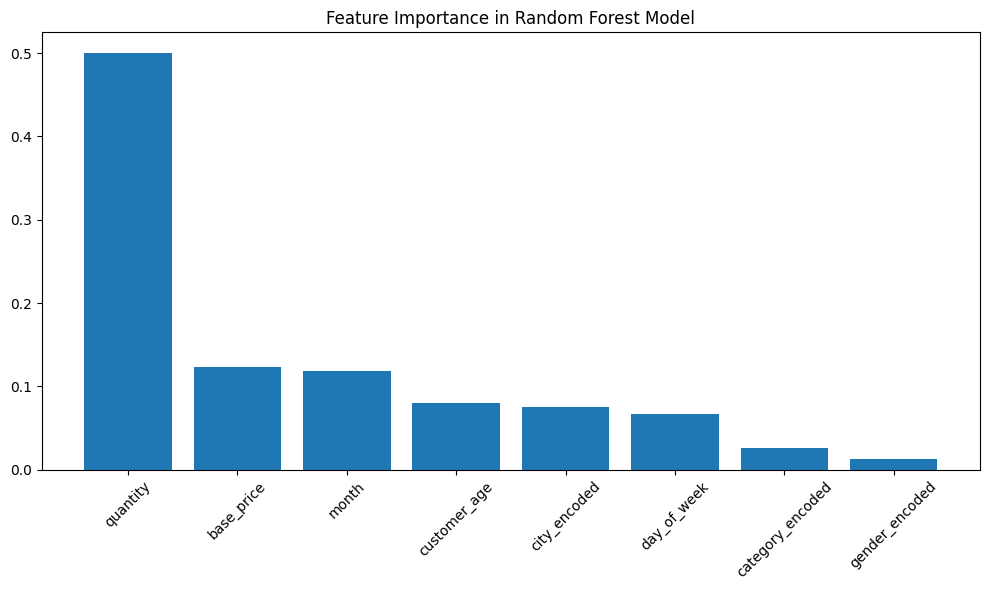

In [10]:
# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()